Here I develop the diffusion curves for the magEIS microbust

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

Define physical constants and relativistic $\beta$ and $\gamma$, functions of kinetic energy for electrons

In [2]:
c = 3.0E8 # m/s
mu_0 = 1.26E-6 # H·m−1 or N·A−2
eps0 = 8.85E-12 # F/m
m_p = 1.7E-27 # kg
m_e = 9.1E-31 # kg
q_e = -1.6E-19 # C
beta = lambda Ek: np.sqrt(1-(Ek/511+1)**(-2))
gamma = lambda Ek: np.sqrt(1-beta(Ek)**2)**(-1/2)

Define a dipole magnetic field function in terms of L and $\lambda$

In [3]:
B0 = 31.2E-6 # Tesla from Schultz and Lanzerotti 

# MagB is from Eq. 1.23 in Schultz and Lanzerotti for a dipole field.
magB = lambda mlat, L: (B0/L**3)*np.sqrt(1 + 3*np.power(np.sin(np.deg2rad(mlat)), 2))/np.cos(np.deg2rad(mlat))**6

Define plasma frequency $\omega_{pe}$, gyrofrequency $\omega_{ce}$, and the chorus |k| (assume parallel propagation and cold plasma dispersion relation).

These equations are parametrized in terms of L shell and magnetic latitude using a dipole magnetic field

In [4]:
wce = lambda λ, Ldip: np.abs(q_e)*magB(λ, Ldip)/m_e
n_e = lambda n0, λ = None: n0 # Electron number density. Currently constant, but can assume a complex function.
wpe = lambda n0, λ = None: np.sqrt(n_e(n0, λ)*q_e**2/(m_e*eps0))
magk = lambda w, n0, λ, Ldip: (w/c)*np.sqrt(1 - wpe(n0, λ)**2/(w*(w - wce(λ, Ldip))))

In [5]:
def p(vPerp, vParallel):
    """
    Map velocity to momentum space
    v is two lists, vperp and vparallel.
    """
    pPerp = vPerp/np.sqrt(1 - (vPerp**2 + vParallel**2)/c**2)/c
    pParallel = vParallel/np.sqrt(1 - (vPerp**2 + vParallel**2)/c**2)/c
    return pPerp, pParallel

Assuming a resonance, define the perpendicular velocity given a set of conditions and parallel velocity

In [6]:
def resCurveVperp(vParallel, w, n0, λ, L, n = 1):
    """
    This function defines the perpendicular velocity of a resonant particle with arbitrary resonance number.
    """
    A = c**2*(w**2 + (magk(w, n0, λ, L)*vParallel)**2 - 2*w*vParallel*magk(w, n0, λ, L))/(wce(λ, L)*n)**2
    return np.sqrt(c**2 - vParallel**2 - A)

def resCurveVparallel(vPerp, w, n0, λ, L, n = 1):
    A = magk(w, n0, λ, L)*w
    B = n*np.sqrt(-(magk(w, n0, λ, L)*wce(λ, L)*vPerp)**2 + (magk(w, n0, λ, L)*wce(λ, L))**2 + (w*wce(λ, L))**2
                 + (n*wce(λ, L)*vPerp)**2 - n**2*wce(λ, L)**4)
    C = magk(w, n0, λ, L)**2 - (n*wce(λ, L))**2
    return (A + B)/C, (A - B)/C

Assuming a constant phase velocity, the following function maps the electron parallel velocity into perpendicular velocity along a diffusion curve (conservation of kinetic energy implied). Free parameters are the phase velocity and 

In [7]:
def calcDiffusionCurveConstantU(v_parallel,  u_0, v_0):
    """
    This function returns the perpendicular velocity from the diffusion
    equation given in Eq. 6 in Summers et al. 1998. 

    Input velocity units must be divided by c!

    THIS FUNCTION ASSUMES THAT THE WAVE PHASE VELOCITY IS CONSTANT!
    """
    numerator = ( -(1 - (u_0*v_0)**2)*v_parallel**2 + 
        2*u_0*(1 - v_0**2)*v_parallel + v_0**2 + u_0**2)
    denomimator = 1 - u_0**2
    return np.sqrt(numerator/denomimator)

In [8]:
v_a = lambda B, n: 1e-9*B/np.sqrt(mu_0*n*m_p)
summersAlpha = lambda B, n: (m_p/m_e)*(v_a(n, B)/c)**2
u = lambda omega, B, n: np.sqrt(summersAlpha(B, n)*omega*(1 - omega))

Define a generic diffusion curve calculator wrapper

In [9]:
def calcDiffusionCurveConstantUWrapper(v_parallel, E, B, n, omega):
    """
    Energy must be in keV!
    """
    u_ph = u(omega, B, n)
    v_0 = beta(E)
    v_perp = calcDiffusionCurveConstantU(v_parallel,  u_ph, v_0)
    
    #filter out the nan's
    validV = np.where(np.logical_not(np.isnan(v_perp)))[0]
    return v_perp[validV], v_parallel[validV]

In [10]:
def drawArc(r, theta):
    """
    This function will draw arcs of radius r (can map it to momenta)
    """
    return r*np.cos(np.deg2rad(theta)), r*np.sin(np.deg2rad(theta))

Now play around with the parameters to get a sence of what the curves look like

fpe/fce = 406.315241960362
[] []
[] []
[] []
[] []
[] []
[] []


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


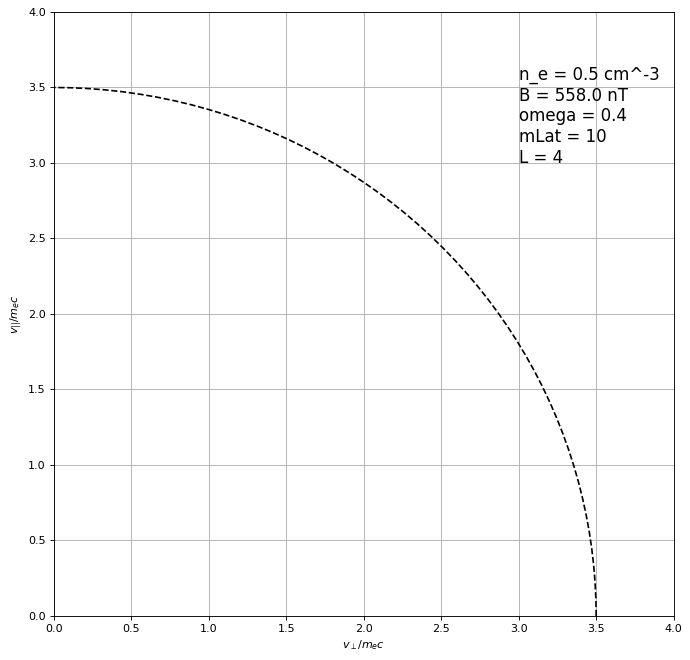

In [11]:
#E = [34, 54, 78, 108, 143, 182, 223]
E = np.arange(100, 1500, 250)
n = 0.5E6 # cm^-3 # Just a guess
omega = 0.4 # wave frequency/elctron gyrofrequncy
λ = 10
L = 4
harmonic = 1
print('fpe/fce = {}'.format(wpe(1E6*n, λ)/wce(λ, L)))

v_parallel = np.linspace(0, 0.6, num = 50)
params = 'n_e = {} cm^-3 \nB = {} nT \nomega = {} \nmLat = {} \nL = {}'.format(
    n/1e6, round(magB(λ, L)*1E9, 0), omega, λ, L)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
for e in E:
    # Calculate diffusion curve
    v_perpFlt, v_parallelFlt = calcDiffusionCurveConstantUWrapper(v_parallel, e, magB(λ, L), n, omega)
    print(v_perpFlt, v_parallelFlt )
    p_perpFlt, p_parallelFlt = p(v_perpFlt*c, v_parallelFlt*c)
    # Plot the results
    plt.plot(p_perpFlt, p_parallelFlt) #, label = '{} keV'.format(e))

# Draw arcs of equal energy (momentum)
r = 3.5
theta = np.linspace(0, 90)
constPperp, constPparallel = drawArc(r, theta)

plt.plot(constPperp, constPparallel, 'k--')

plt.xlabel(r'$v_{\perp}/m_e c$'); plt.ylabel(r'$v_{||}/m_e c$')
plt.text(3, 3, params, ha = 'left', fontsize = 15)
plt.legend()
plt.axes().set_ylim(0, 4)
plt.axes().set_xlim(0, 4)
plt.grid(True)
#plt.axes().set_aspect('equal')